#  Import statements

In [1]:
#imports
import pandas as pd
df = pd.read_csv('ProcessedData.tsv', delimiter = '\t', encoding = 'utf-8')
df.head(5)

,NewCategory,title,author,published_date,updated_on,slug,blurb,body
0,Business & Finance,Bitcoin is down 60 percent this year. Here's w...,Timothy B. Lee,3/31/2014 14:01,12/16/2014 16:37,http://www.vox.com/2014/3/31/5557170/bitcoin-b...,Bitcoins have lost more than 60 percent of the...,The markets haven't been kind to Bitcoin in 20...
1,Crime,6 health problems marijuana could treat better...,German Lopez,3/31/2014 15:44,11/17/2014 0:20,http://www.vox.com/2014/3/31/5557700/six-probl...,Medical marijuana could fill gaps that current...,Twenty states have so far legalized the medica...
2,Business & Finance,9 charts that explain the history of global we...,Matthew Yglesias,4/10/2014 13:30,12/16/2014 15:47,http://www.vox.com/2014/4/10/5561608/9-charts-...,These nine charts from Thomas Piketty's new bo...,Thomas Piketty's book Capital in the 21st Cent...
3,Crime,Remember when legal marijuana was going to sen...,German Lopez,4/3/2014 23:25,5/6/2014 21:58,http://www.vox.com/2014/4/3/5563134/marijuana-...,"Three months after legalizing marijuana, Denve...",When Colorado legalized recreational marijuana...
4,Technology & Health,Obamacare succeeded for one simple reason: it'...,Sarah Kliff,4/1/2014 20:26,11/18/2014 15:09,http://www.vox.com/2014/4/1/5570780/the-two-re...,"After a catastrophic launch, Obamacare still s...",There's a very simple reason that Obamacare hi...


In [2]:
from io import StringIO
col = ['NewCategory', 'title']
df = df[col]
df = df[pd.notnull(df['title'])]
df.columns = ['NewCategory', 'title']
df['category_id'] = df['NewCategory'].factorize()[0]
category_id_df = df[['NewCategory', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'NewCategory']].values)
df.head()

,NewCategory,title,category_id
0,Business & Finance,Bitcoin is down 60 percent this year. Here's w...,0
1,Crime,6 health problems marijuana could treat better...,1
2,Business & Finance,9 charts that explain the history of global we...,0
3,Crime,Remember when legal marijuana was going to sen...,1
4,Technology & Health,Obamacare succeeded for one simple reason: it'...,2


# Creating new features

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.title).toarray()
labels = df.NewCategory
features.shape

(11683, 3821)

# Spiltting the Data into Training and Testing

In [4]:
#Training and Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 0)

# Training Random Forest Classifier

In [5]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifier = RandomForestClassifier(n_estimators=100, random_state=42)  
clf = classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test) 

In [28]:
#5_cross_validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv=5)

In [29]:
scores.mean()

0.7524098823576997

# Hyperparameter Tuning

In [30]:
#n_estimators = 1000
classifier = RandomForestClassifier(n_estimators=1000, random_state=42)  
clf = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Performance Metric

1. Accuracy

In [31]:
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest model:", acc*100)

Accuracy of Random Forest model: 77.66367137355584


2. F1 Score

In [32]:
from sklearn.metrics import f1_score
print("F1 Score for all the categories:")
f1_score(y_test, y_pred, average=None)

F1 Score for all the categories:


array([0.38974359, 0.7150838 , 0.70682731, 0.85995086, 0.72125436])

3. Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix 

array([[  38,    4,   26,   42,   14],
       [   2,  256,   25,   70,   12],
       [  12,   15,  264,   42,   26],
       [  13,   64,   47, 1050,   41],
       [   6,   12,   26,   23,  207]])

4. Precision-Recall

In [34]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

 Business & Finance       0.54      0.31      0.39       124
              Crime       0.73      0.70      0.72       365
      Entertainment       0.68      0.74      0.71       359
           Politics       0.86      0.86      0.86      1215
Technology & Health       0.69      0.76      0.72       274

           accuracy                           0.78      2337
          macro avg       0.70      0.67      0.68      2337
       weighted avg       0.77      0.78      0.77      2337



In [35]:
df11 = pd.DataFrame(report).transpose()
df11

,precision,recall,f1-score,support
Business & Finance,0.535211,0.306452,0.389744,124.000000
Crime,0.729345,0.701370,0.715084,365.000000
Entertainment,0.680412,0.735376,0.706827,359.000000
Politics,0.855746,0.864198,0.859951,1215.000000
Technology & Health,0.690000,0.755474,0.721254,274.000000
accuracy,0.776637,0.776637,0.776637,0.776637
macro avg,0.698143,0.672574,0.678572,2337.000000
weighted avg,0.772630,0.776637,0.772593,2337.000000


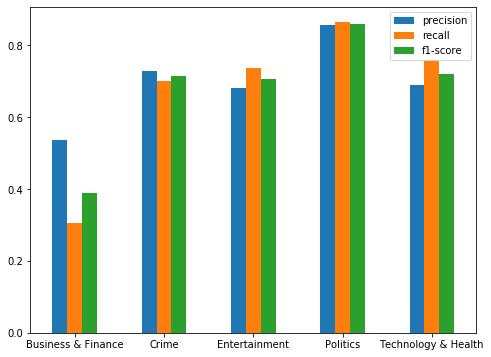

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
bb= ['precision','recall','f1-score']
# a simple line plot
df11.iloc[0:5].plot(kind='bar',y= bb,figsize=(8,6),rot=0)

In [40]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlim(-0.5, len(np.unique(labels))-0.5)
    plt.ylim(len(np.unique(labels))-0.5, -0.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

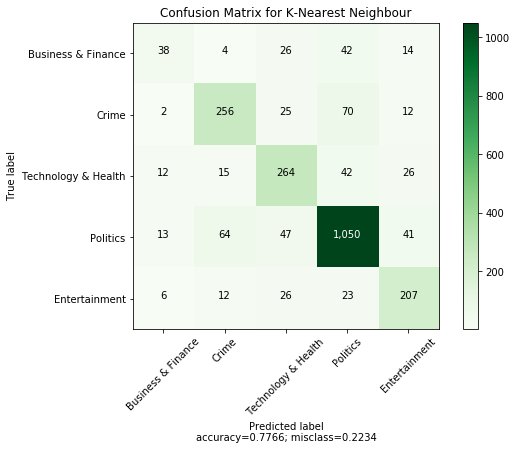

In [43]:
plot_confusion_matrix(cm           =confusion_matrix, 
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for K-Nearest Neighbour")